In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#cargar datos
import os 
ruta=os.getcwd()
archivo=os.listdir(ruta+'/EMG_data_for_gestures-master')
serie1=[] #guardar en matriz tridimensional? para no tener dos series por aparte
serie2=[]
for i in archivo[0:-1]: #ignora el readme
    v=os.listdir(ruta+'/EMG_data_for_gestures-master'+'/'+i)
    x1=np.loadtxt(ruta+'/EMG_data_for_gestures-master'+'/'+i+'/'+v[0],skiprows=1,delimiter='\t',usecols=range(0,9))
    x2=np.loadtxt(ruta+'/EMG_data_for_gestures-master'+'/'+i+'/'+v[1],skiprows=1,delimiter='\t',usecols=range(0,9))
    serie1.append(x1)
    serie2.append(x2)
serie1=np.array(serie1,dtype=object)
serie2=np.array(serie2,dtype=object)
#serie1[0] -->Serie 1 del primer sujeto y no carga la columna class porque el ultimo dato de la serie 1 del sujeto 34 le falta el valor (creo que es por eso)
#se podría arreglar skipeando también la última fila

1. Crear una función que reciba la señal de EMG y permita aplicar el operador Teager-Kaiser Energy Operator (TKEO).

In [25]:
def tkeo(data): 
    x=data*1
    x[1:-1]=np.square(x[1:-1])-np.multiply(x [0:-2],x[2:]) #aplica la función para todos los datos menos el primero y el último, que no es un problema (describir en análisis)
    return x

2. Crear una función que reciba una señal EMG de múltiples canales y calcule el operador TKEO para cada canal.

In [26]:
def tkeoall(xdata): #se le entrega la matriz incluyendo la columna del tiempo (no la de class)
    data=xdata[:,1:]*1
    tkeoforchannel=np.apply_along_axis(tkeo,0,data)
    return tkeoforchannel #saca un array donde tkeoall(data)[0] es el primer canal

3. Crear una función que reciba una señal EMG de múltiples canales que extraiga las siguientes características para cada canal (10 %):
   -  RMS
   -  Varianza
   -  Mean Absolute Value
   -  Mean Absolute Value Slope
   -  Slope Sign Changes
   -  Wave form length
   -  Zero Crossing

In [27]:
def rms(x): #x es un array
    x_squared=np.square(x)
    x_mean=np.mean(x_squared)
    xrms=np.sqrt(x_mean)
    return xrms

In [28]:
#funcion
def caracteristicas(data): 
    carac_canales=[]
    for i in range(0,np.shape(data)[1]): #tal vez se pueda usar apply_along_axis para calcular todas
        xx=data[:,i]
        xrms=rms(xx) #root mean square
        xvar=np.var(xx) #varianza
        xmav=np.mean(np.abs(data)) #mean absolute value
        xmavs=np.mean(np.abs(np.diff(data))) #mean absolute value slope
        derivative = np.diff(data)
        xssc = np.sum(np.diff(np.sign(derivative)) != 0) #Slope sign changes
        diff_abs = np.abs(np.diff(data))
        xwl = np.sum(diff_abs) #waveform length
        xzc = len(np.where(np.diff(np.sign(data)))[0]) #zero crossings
        carac_canal_actual=[xrms,xvar,xmav,xmavs,xssc,xwl,xzc]
        carac_canales.append(carac_canal_actual)
    return np.array(carac_canales)
#caracteristicas(serie1[0])[0]


4. Crear una rutina que aplique sobre todo los archivos de la base de datos las funciones descritas en 2 y 3 (5 %)

In [29]:
#tkeo_sujetos=np.apply_along_axis(tkeoall,0,serie1) por algún motivo, esto no funciona. Y es una lástima
tkeo_serie1=[]
for i in range(0,np.shape(serie1)[0]):
    tkeo_serie1.append((tkeoall(serie1[i]))) 
carac_tkeo_serie1=[] #carac_tkeo_serie2[0][0] primer sujeto, primer canal
for i in range(0,len(tkeo_serie1)):
    carac_tkeo_serie1.append((caracteristicas(tkeo_serie1[i])))
    #carac_serie1[0][0] -->valores para el primer canal de la primera serie del primer sujeto

In [30]:
#ahora lo mismo, pero para la serie 2
tkeo_serie2=[]
for i in range(0,np.shape(serie2)[0]):
    tkeo_serie2.append((tkeoall(serie2[i]))) 
carac_tkeo_serie2=[] #carac_tkeo_serie2[0][0] primer sujeto, primer canal
for i in range(0,len(tkeo_serie2)):
    carac_tkeo_serie2.append((caracteristicas(tkeo_serie2[i])))

5. Crear una rutina que aplique sobre todo los archivos de la base de datos las función 3 sobre las señales originales

In [31]:
carac_serie1=[]
for i in range(0,len(serie1)):
    carac_serie1.append((caracteristicas(serie1[i])))
carac_serie2=[] #carac_serie[0][0] sujeto 1,canal1
for i in range(0,len(serie2)):
    carac_serie2.append((caracteristicas(serie2[i])))

6. Almacene las métricas obtenidas en el ítem 4 y 5 en un dataframe, en donde haya una columna que discrimine si las características provienen de una señal con TKEO o sin TKEO.

In [32]:
import pandas as pd

datos = {'Sujeto':[],'Canal':[],'Caracteristica':[],'Sin TKEO':[],'Con TKEO':[]}
meds=['RMS','VAR','MAV','MAVS','SSC','WFL','ZC']
for sujeto in range(0,36):
    for canal in range(0,8):
        for medida in range(0,7):
            datos['Sujeto'].append(sujeto+1)
            datos['Canal'].append(canal+1)
            datos['Caracteristica'].append(meds[medida])
            datos['Sin TKEO'].append(carac_serie1[sujeto][canal][medida])  # Supongamos que son datos aleatorios
            datos['Con TKEO'].append(carac_tkeo_serie1[sujeto][canal][medida])

df=pd.DataFrame(datos) 

print(df)

      Sujeto  Canal Caracteristica      Sin TKEO      Con TKEO
0          1      1            RMS  3.785799e+04  7.220306e-08
1          1      1            VAR  3.588632e+08  5.197030e-15
2          1      1            MAV  3.641943e+03  5.553921e-09
3          1      1           MAVS  4.097186e+03  6.202341e-09
4          1      1            SSC  2.671750e+05  4.242500e+04
...      ...    ...            ...           ...           ...
2011      36      8            MAV  3.046029e+03  4.746336e-09
2012      36      8           MAVS  3.426782e+03  6.231854e-09
2013      36      8            SSC  2.183920e+05  3.546700e+04
2014      36      8            WFL  1.436233e+09  2.285408e-03
2015      36      8             ZC  1.743660e+05  2.796000e+04

[2016 rows x 5 columns]


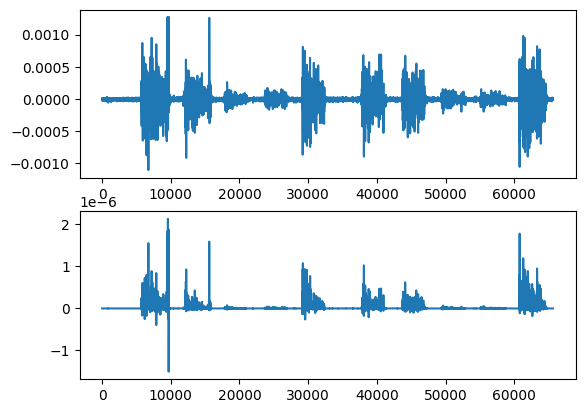

In [33]:
#esta es una casilla para probar cosas :)
tkeo_channel_1=tkeoall(serie1[0])
ts=serie1[0][:,0]
plt.subplot(211)
plt.plot(ts,serie1[0][:,1]) #canal 1 sujeto 1
plt.subplot(212)
plt.plot(ts[1:-1],tkeo_serie1[0][:,0][1:-1])
#plt.axis([t[0],t[-1],np.min(tkeo_channel_1[1:-1]),np.max(tkeo_channel_1[1:-1])])
#np.shape(tkeo_channel_1)

7. Realice un análisis exploratorio de los datos (Estadística descriptiva) teniendo como base la teoría vista en clase (Diagramas de cajas, gráficos, medidas de tendencia central)

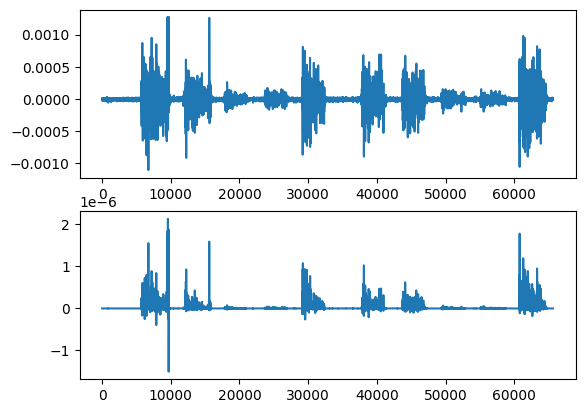

In [34]:
sujeto=0
canal=1
plt.subplot(211)
plt.plot(serie1[sujeto][:,0],serie1[sujeto][:,canal]) #Primeros corchetes son el paciente, los segundos son el canal 
#El canal corresponde al tiempo, por lo tanto se omite en el eje y
plt.subplot(212)
plt.plot(serie1[sujeto][:,0][1:-1],tkeo_serie1[sujeto][:,canal-1][1:-1]) 




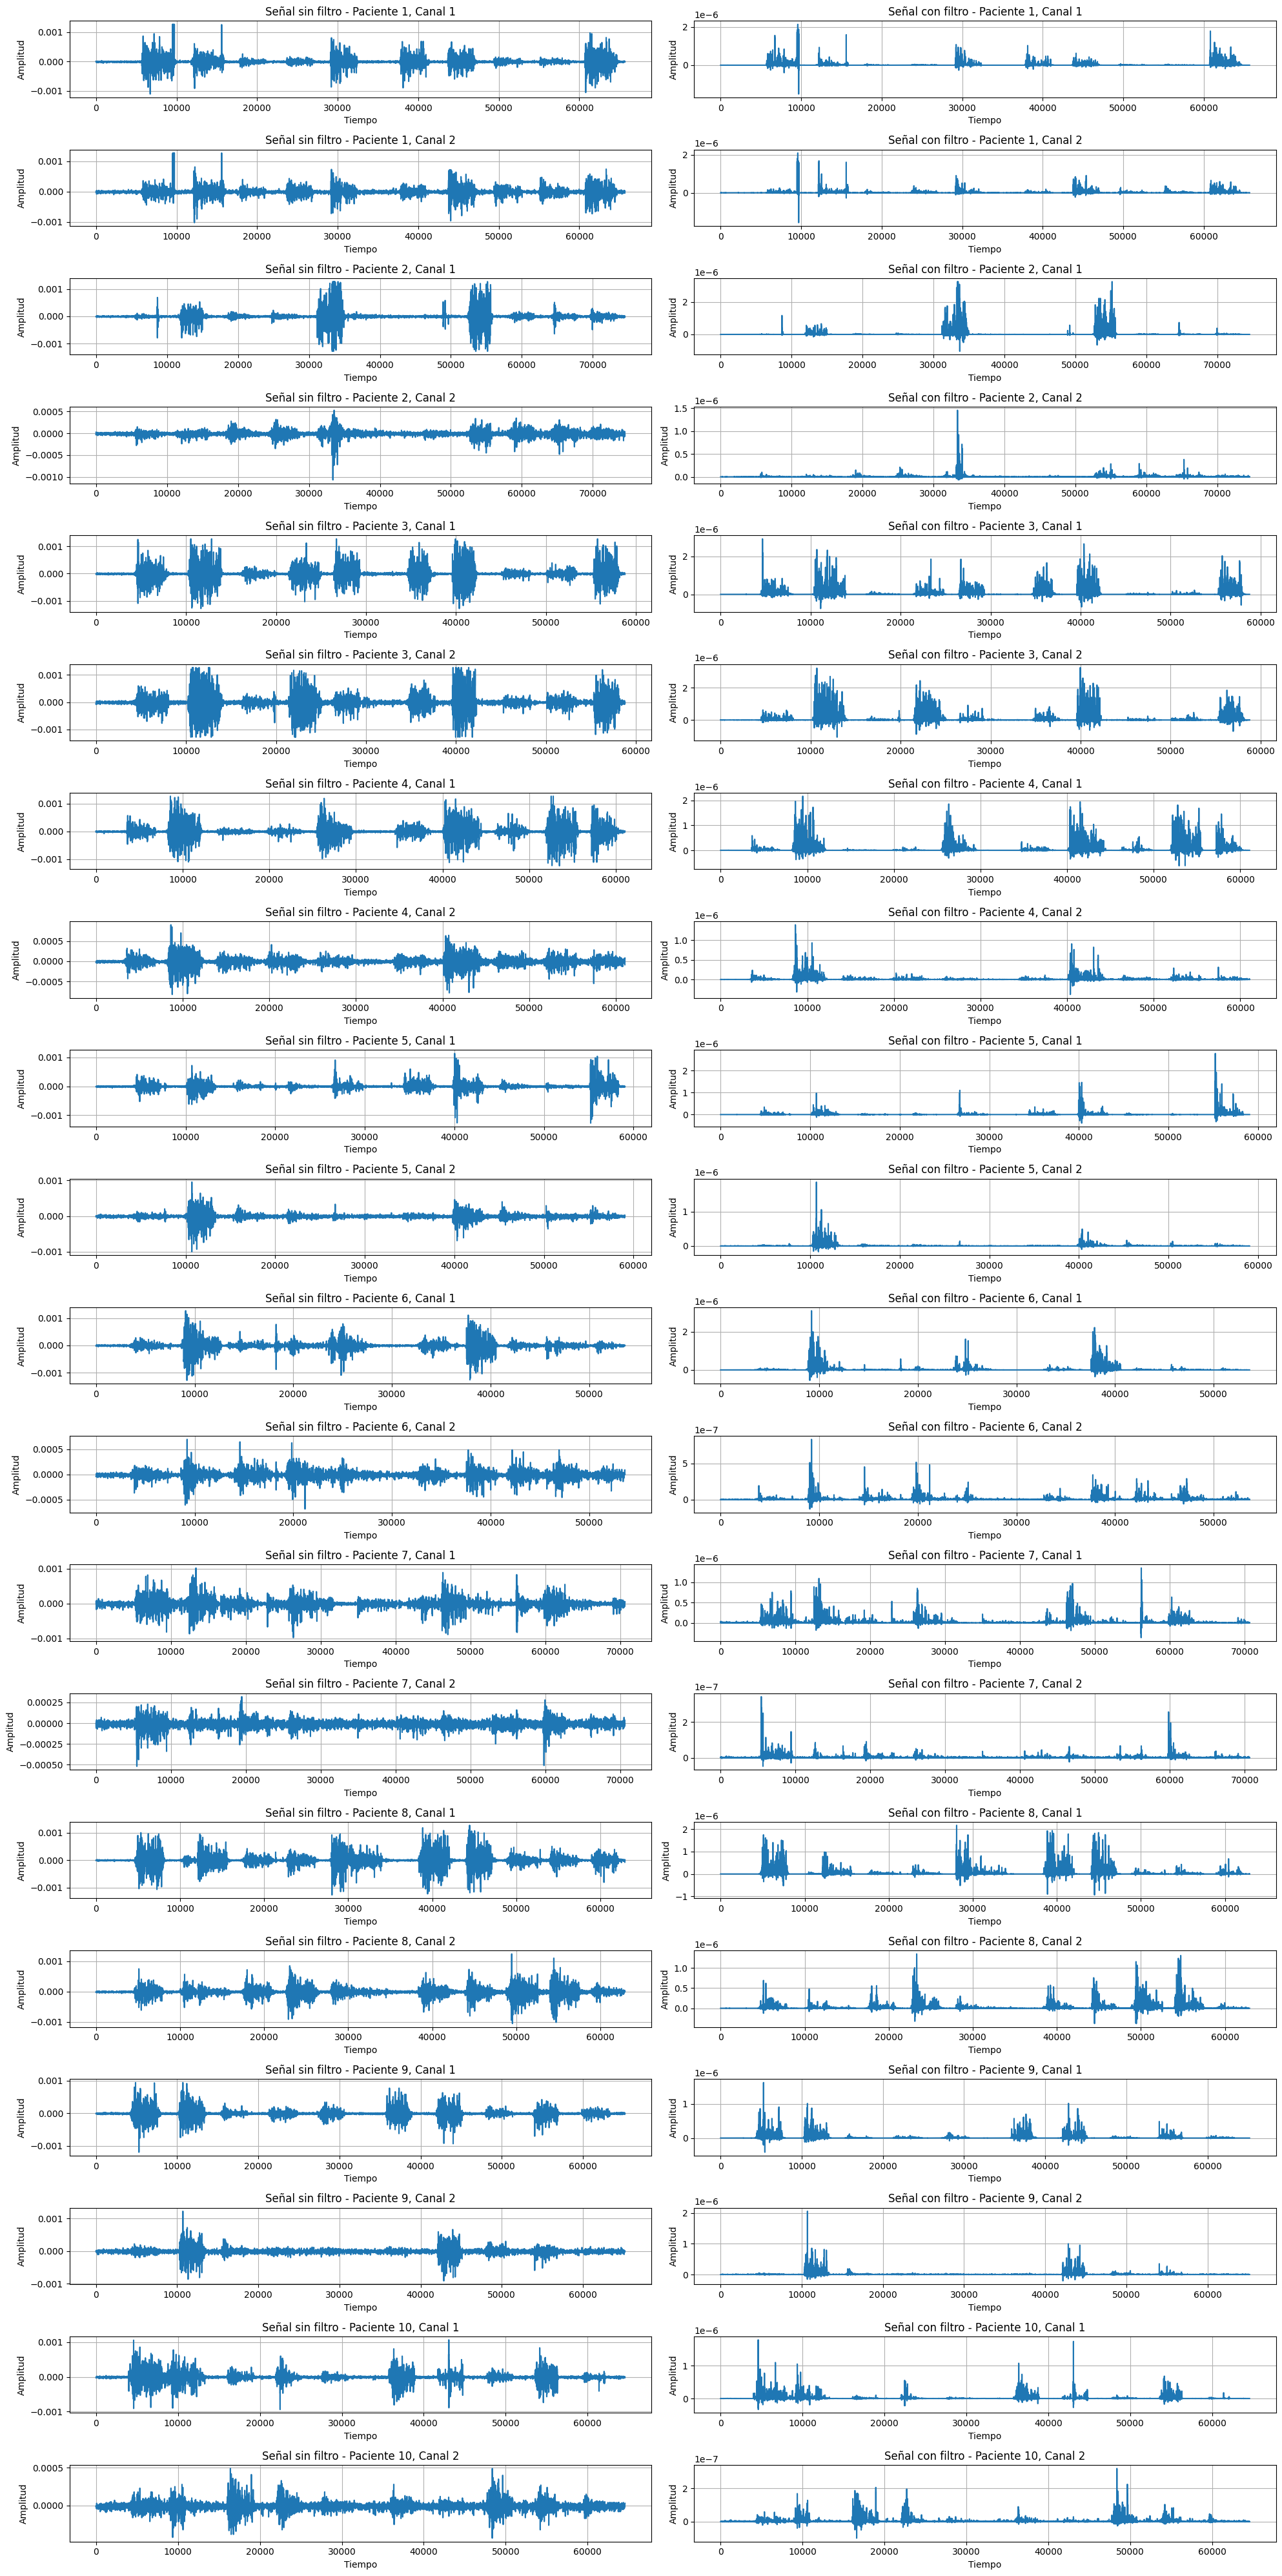

In [35]:
# Definir el tamaño de la figura y los subplots
plt.figure(figsize=(20, 40))

# Iterar sobre los pacientes
for i, data in enumerate(serie1[:10], start=1):
    # Iterar sobre los dos canales de cada paciente
    for j in range(1, 3):
        # Graficar la señal sin filtro
        plt.subplot(20, 2, (i-1)*4 + j*2 - 1)  # Índice para la señal sin filtro
        plt.plot(data[:, 0], data[:, j])
        plt.title(f'Señal sin filtro - Paciente {i}, Canal {j}')
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        plt.grid(True)
        
        # Graficar la señal con filtro
        plt.subplot(20, 2, (i-1)*4 + j*2)  # Índice para la señal con filtro
        plt.plot(data[:, 0][1:-1], tkeo_serie1[i-1][:, j-1][1:-1])
        plt.title(f'Señal con filtro - Paciente {i}, Canal {j}')
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        plt.grid(True)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

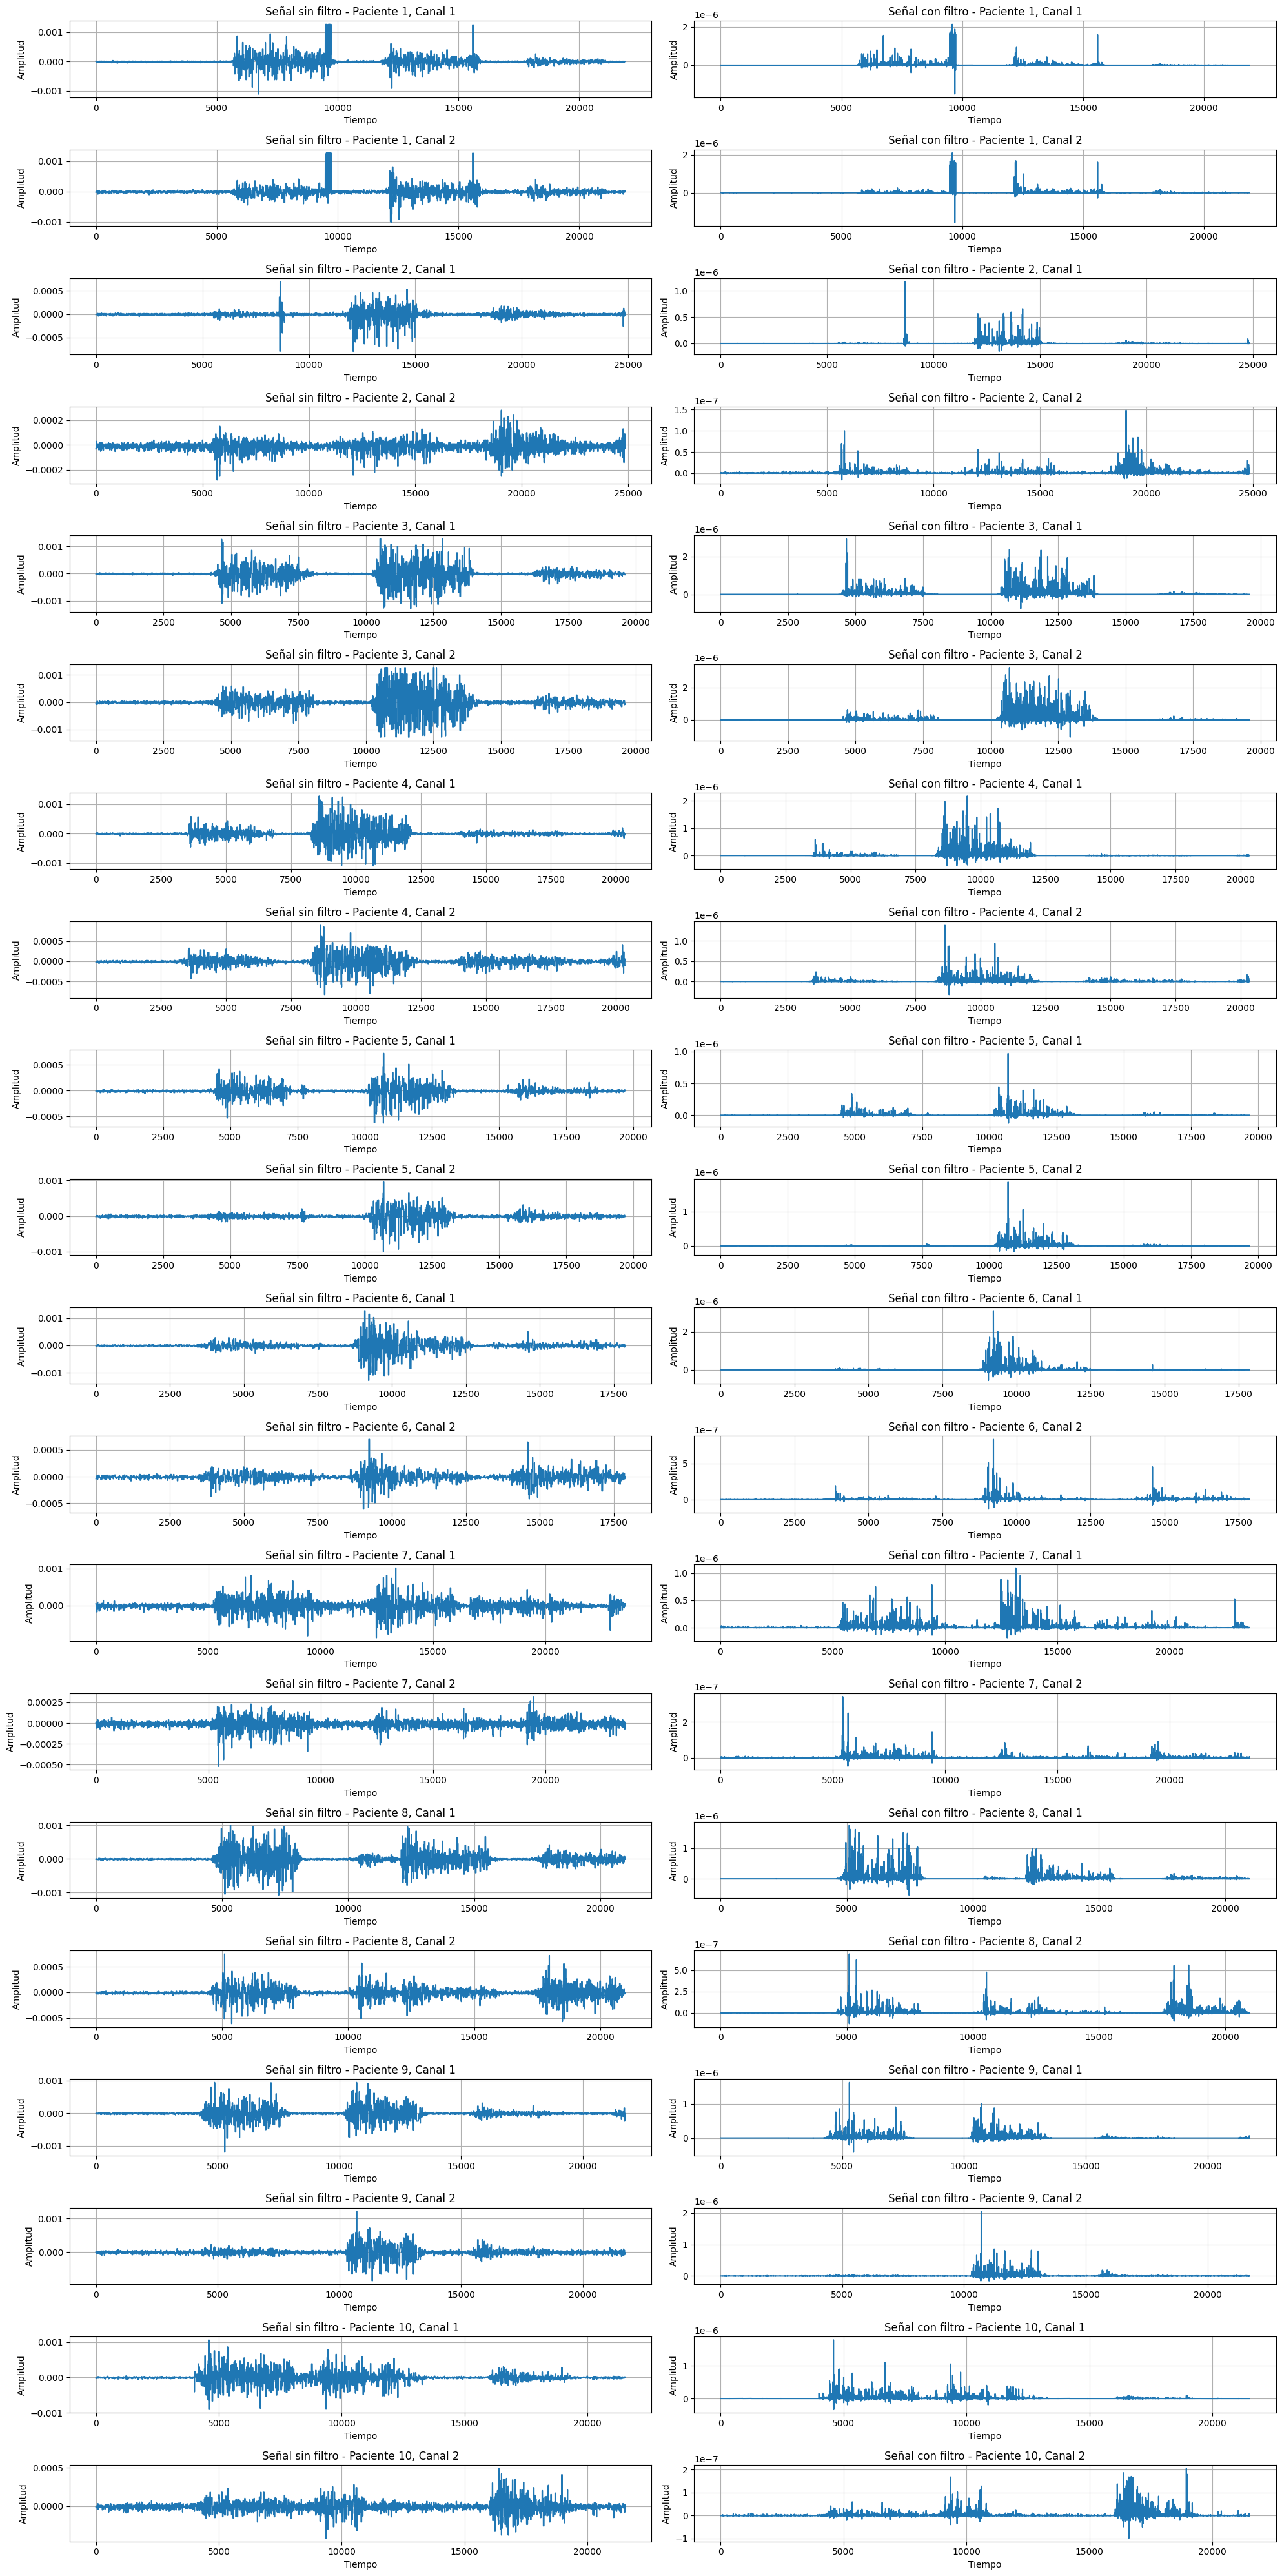

In [36]:
# Definir el tamaño de la figura y los subplots
plt.figure(figsize=(20, 40))

# Iterar sobre los pacientes
for i, data in enumerate(serie1[:10], start=1):
    # Iterar sobre los dos canales de cada paciente
    for j in range(1, 3):
        # Obtener el rango de tiempo para mostrar solo la primera tercera parte del ciclo
        tiempo = data[:, 0]
        tiempo_inicial = tiempo[0]
        tiempo_final = tiempo[0] + (tiempo[-1] - tiempo[0]) / 3  # Mostrar solo la primera tercera parte
        indices = (tiempo >= tiempo_inicial) & (tiempo <= tiempo_final)
        
        # Graficar la señal sin filtro
        plt.subplot(20, 2, (i-1)*4 + j*2 - 1)  # Índice para la señal sin filtro
        plt.plot(tiempo[indices], data[:, j][indices])
        plt.title(f'Señal sin filtro - Paciente {i}, Canal {j}')
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        plt.grid(True)
        
        # Graficar la señal con filtro
        plt.subplot(20, 2, (i-1)*4 + j*2)  # Índice para la señal con filtro
        plt.plot(tiempo[indices][1:-1], tkeo_serie1[i-1][:, j-1][indices][1:-1])
        plt.title(f'Señal con filtro - Paciente {i}, Canal {j}')
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        plt.grid(True)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

In [40]:
import numpy as np
from scipy import stats

# Función para dividir la señal en intervalos específicos
def dividir_ciclos(señal):
    # Definir los límites de los intervalos para cada ciclo
    inicio_ciclo1 = 0
    fin_ciclo1 = 20000
    inicio_ciclo2 = 20000
    fin_ciclo2 = 40000
    inicio_ciclo3 = 40000
    fin_ciclo3 = len(señal)

    # Dividir la señal en tres ciclos
    ciclo1 = señal[inicio_ciclo1:fin_ciclo1]
    ciclo2 = señal[inicio_ciclo2:fin_ciclo2]
    ciclo3 = señal[inicio_ciclo3:fin_ciclo3]

    return ciclo1, ciclo2, ciclo3

# Obtener los ciclos de todos los pacientes, canales y ciclos 1
ciclo1_todos = [dividir_ciclos(tkeo_serie1[paciente][:, 0])[0] for paciente in range(10)]

# Obtener los ciclos de todos los pacientes, canales y ciclos 2
ciclo2_todos = [dividir_ciclos(tkeo_serie1[paciente][:, 0])[1] for paciente in range(10)]

# Obtener los ciclos de todos los pacientes, canales y ciclos 3
ciclo3_todos = [dividir_ciclos(tkeo_serie1[paciente][:, 0])[2] for paciente in range(10)]

# Prueba de homocedasticidad de Levene para comparar varianzas de los ciclos entre pacientes
pvalues1 = stats.levene(*ciclo1_todos)
pvalues2 = stats.levene(*ciclo2_todos)
pvalues3 = stats.levene(*ciclo3_todos)

# Imprimir resultados
print('Homocedasticidad de Levene para todos los pacientes, canales y ciclos 1:')
for i, pvalue in enumerate(pvalues1):
    print(f' - Ciclo {i+1}: p-value = {pvalue}')

print('Homocedasticidad de Levene para todos los pacientes, canales y ciclos 2:')
for i, pvalue in enumerate(pvalues2):
    print(f' - Ciclo {i+1}: p-value = {pvalue}')

print('Homocedasticidad de Levene para todos los pacientes, canales y ciclos 3:')
for i, pvalue in enumerate(pvalues3):
    print(f' - Ciclo {i+1}: p-value = {pvalue}')

Homocedasticidad de Levene para todos los pacientes, canales y ciclos 1:
 - Ciclo 1: p-value = 9.536059956533883
 - Ciclo 2: p-value = 1.125202418102269e-14
Homocedasticidad de Levene para todos los pacientes, canales y ciclos 2:
 - Ciclo 1: p-value = 101.0967314744602
 - Ciclo 2: p-value = 1.2760240234447674e-189
Homocedasticidad de Levene para todos los pacientes, canales y ciclos 3:
 - Ciclo 1: p-value = 12.71647242322254
 - Ciclo 2: p-value = 1.847395916773774e-20
